**8.1 Consider the 'runs' dataset. Estimate the error standard deviation $\sigma$ using the second differences estimator**



In [3]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/runs.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/runs.csv'
runs<-read.csv(data_loc)
library('sm')
sm.sigma(runs$year, runs$R)$estimate

Package 'sm', version 2.2-5.6: type help(sm) for summary information


Attaching package: ‘sm’


The following objects are masked _by_ ‘.GlobalEnv’:

    geyser, trawl




[1] 0.1719719

**8.2 Consider the 'geyser' dataset**

*(a) For the regression function estimate calculated in 7.2, use the function h2df described in the notes to find the degrees of freedom of the estimate*

*(b) Round off the degrees of freedom up to the next largest integer and denote that value by p. Use lm to estimate the parameters of the regression model*

$Y=\alpha+\beta_1X+....+\beta_{p-1}X^{p-1}+e$

where Y duration of the eruption and X is the waiting time; note that like the estimate determined in 7.2 this model has p degrees of freedom

*(c) Using the estimates from part (b), plot the estimated regression line toether with the data and compare the result to the estimate found in 7.2*

Compared to the sm regression plot the regression plot is still able to show the general negative relationship however this data does not appear linear which would suggest a nonparametric approach would be better. 

[1] 3.178481

[1] 9.45


Call:
lm(formula = duration ~ waiting, data = geyser)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21805 -0.72357 -0.01979  0.75071  2.11109 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.313144   0.269935   27.09   <2e-16 ***
waiting     -0.053272   0.003666  -14.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.879 on 297 degrees of freedom
Multiple R-squared:  0.4155,	Adjusted R-squared:  0.4136 
F-statistic: 211.2 on 1 and 297 DF,  p-value: < 2.2e-16


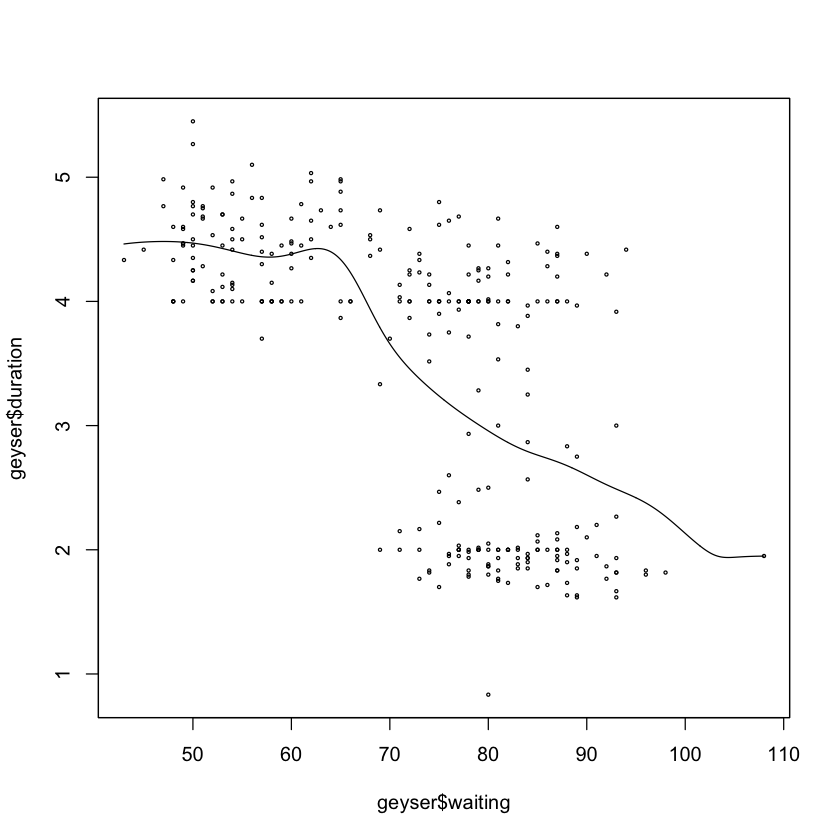

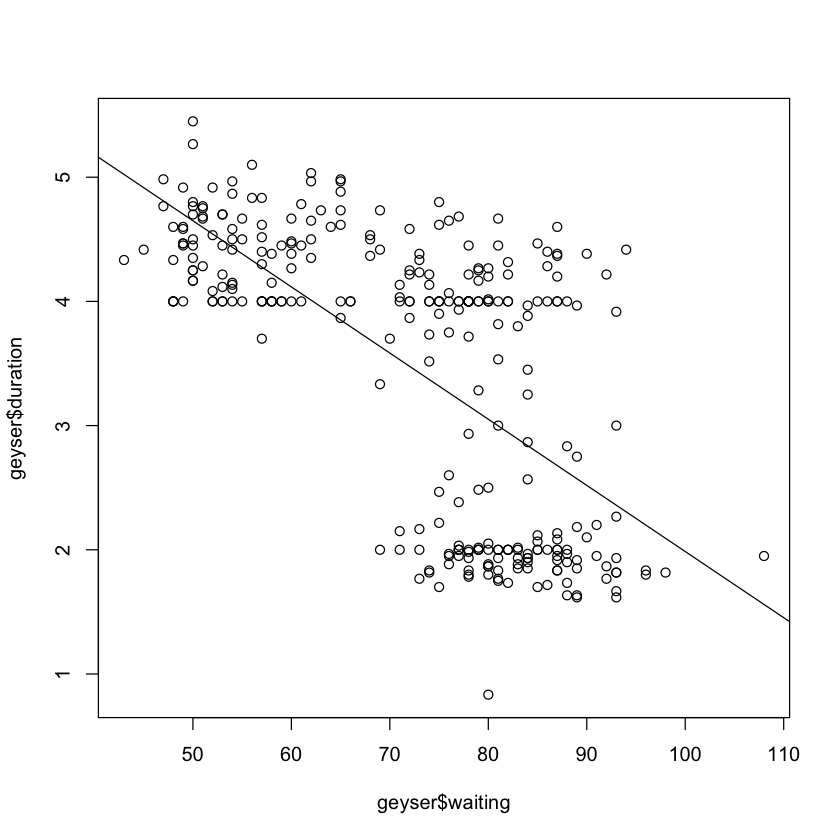

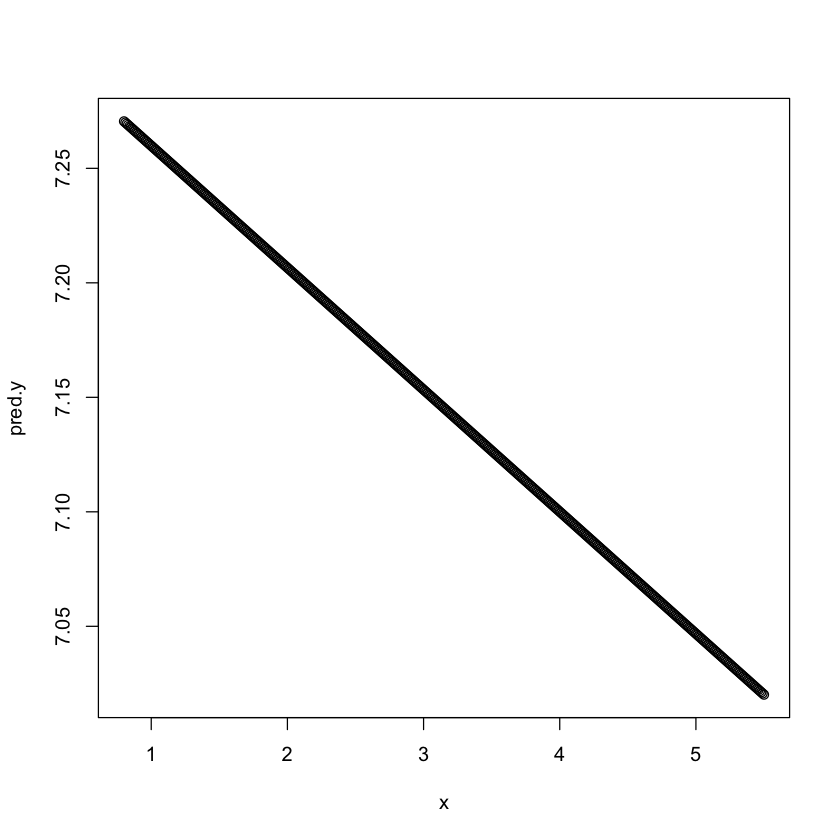

In [5]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/geyser.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/geyser.csv'
geyser<-read.csv(data_loc)
sm.regression(x=geyser$waiting, y=geyser$duration, poly.index=0, method='cv', ngrid=1000)$h


h2df<- function(h_target, x, y){
    f<-function(df){sm.regression(x, y, df=df, display="none")$h - h_target}
    hmin<-sm.regression(x, y, df=length(x), display="none")$h
    hmax<-sm.regression(x, y, df=2.01, display="none")$h
    if ((h_target<= hmax)&(h_target >= hmin)){
        dfroot<-uniroot(f, c(2.01, length(x)), tol=0.005)$root
        return(round(dfroot, 2))
    }else { return("out of range")
    }
}
h2df(3.17848, geyser$waiting, geyser$duration)

p=9
summary(lm(duration~waiting, data=geyser))

plot(geyser$waiting, geyser$duration)
abline(lm(duration~waiting, data=geyser))

x=seq(.8,5.5, .01)
reg.out=lm(duration~waiting, data=geyser)
pred.y=predict(reg.out, newdata=data.frame(waiting=x))

plot(x, pred.y)

**8.3 The  dataset  “pulse”  contains  data  on  the  heights  and  resting  pulses  of  a  sample  ofhospital patients.  The purpose of this exercise is to try to determine if pulse is related toheight.**

*(a) Use a local linear kernel estimator and cross validation to estimate the nonparametric regression function relating pulse (response variable) to height (predictor). Plot the estimate together with the data. Based on this plot does it appear that pulse is related to height?*

Based on this plot it doesn't look like there is a direction relationship between pulse and height

*(b) Compute the p-value for the hypothesis test that conditional expected pulse given height does not depend on height; use the function sm.regression with the argument model='no effect'. Based on this result does it appear that pulse and height are related? Why or why not?*

Based on this result we would reject the hypothesis that pulses does not depend on height. Thought this seems right on the cusp of being significant such that the two variables are not related. Perhaps this is because the relationship is nonlinear.

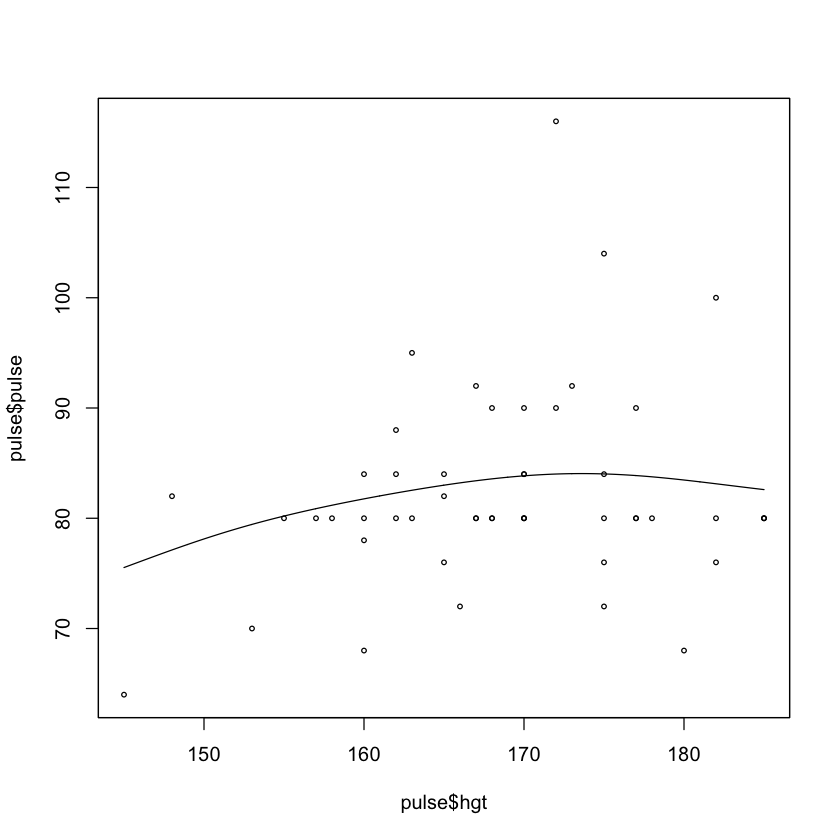

Test of no effect model:  significance =  0.068 


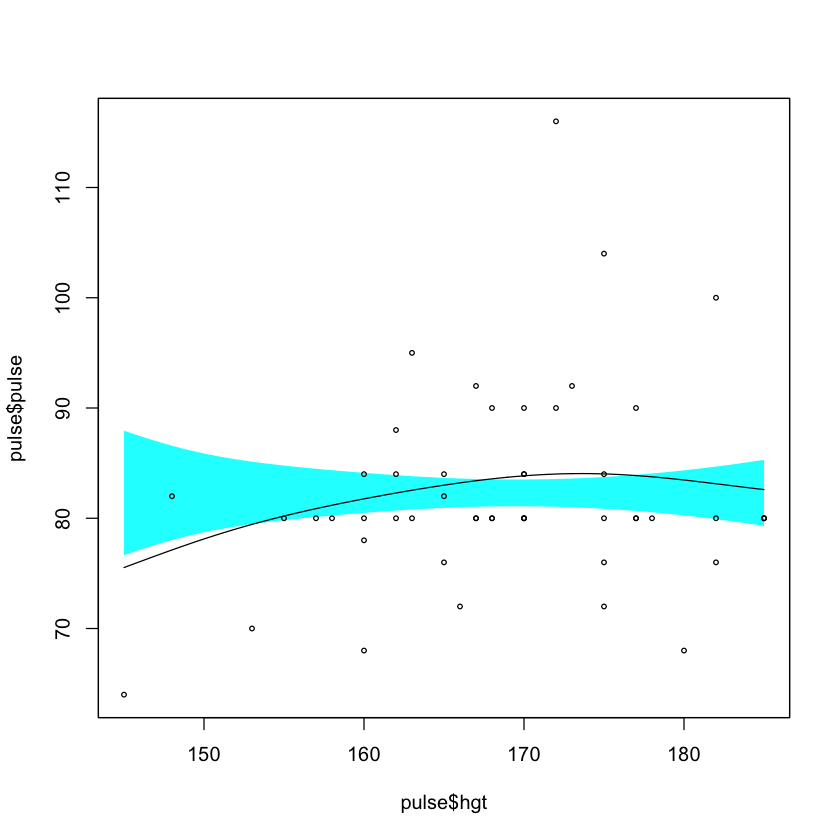

In [24]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/pulse.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/pulse.csv'
pulse<-read.csv(data_loc)
#part a
sm.regression(x=pulse$hgt, y=pulse$pulse, poly.index=0, method='cv', ngrid=1000)

#part b
sm.regression(x=pulse$hgt, y=pulse$pulse, poly.index=0, method='cv', model="no effect", ngrid=1000)



**8.4 The dataset “electricity” contains data on the electricity usage of a house in WestchesterCounty, New York.  There are two variables:usage, the electricity usage (in kilowatt-hours)for a given month, andtemp, the average temperature for the month in degrees F. The goalof the analysis is to model electricity usage as a function of temperature.**

*(a) Using a local linear kernel estimator, estimate and plot the nonparametric regression function relating usage to temp; choose the value of the smoothing parameter using cross validation*

*(b) Compute the p value for the test the hypothesis that the relationship between usage and temp is linear. Based on this result does it appear that the relationship between usage and temp is linear?*

Based on these results would suggest that we reject the hypothesis suggesting the relationship between usage and temp is not linear.

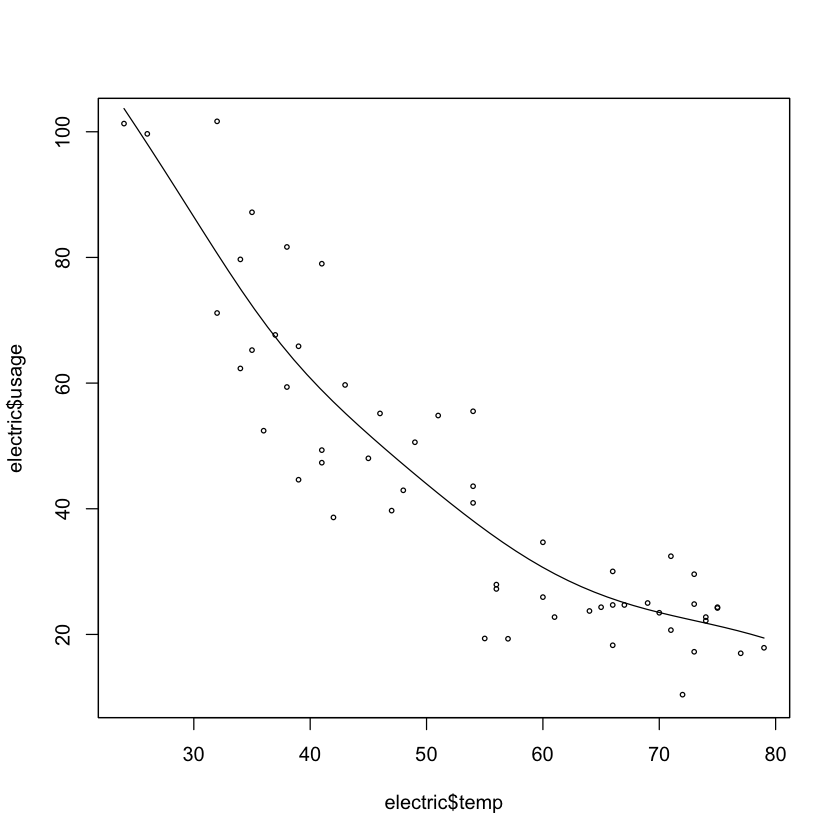

Test of linear model:  significance =  0 


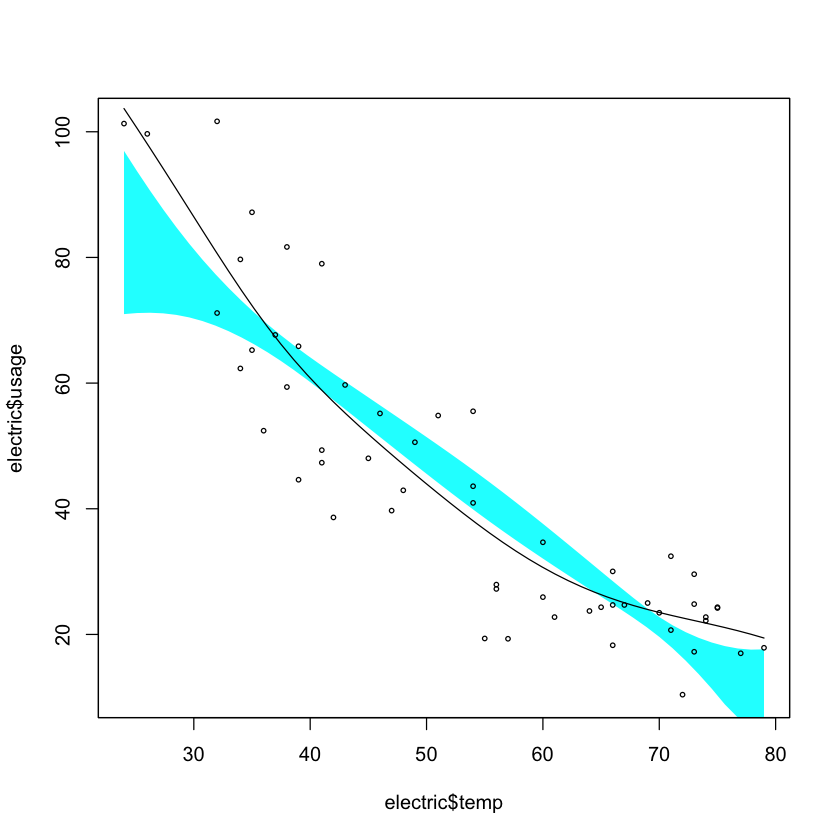

In [33]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/electricity.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/electricity.csv'
electric<-read.csv(data_loc)
#part a
sm.regression(electric$temp, electric$usage, method='cv')
#part b
sm.regression(electric$temp, electric$usage, method='cv', model='linear')

**8.5 Repeat the analysis in the previous exercise using log(usage) in place of usage. Does it appear that the relationship between log(usage) and temp is linear?**

It would appear that the relationship between log(usage) and temp is linera now that we've transformed the data. 

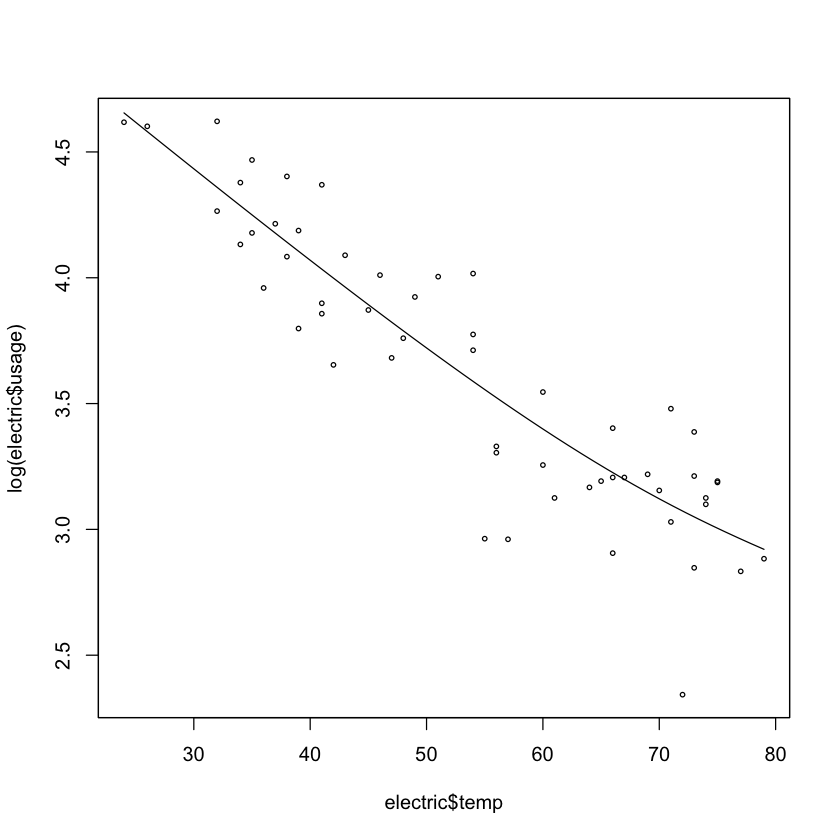

Test of linear model:  significance =  0.198 


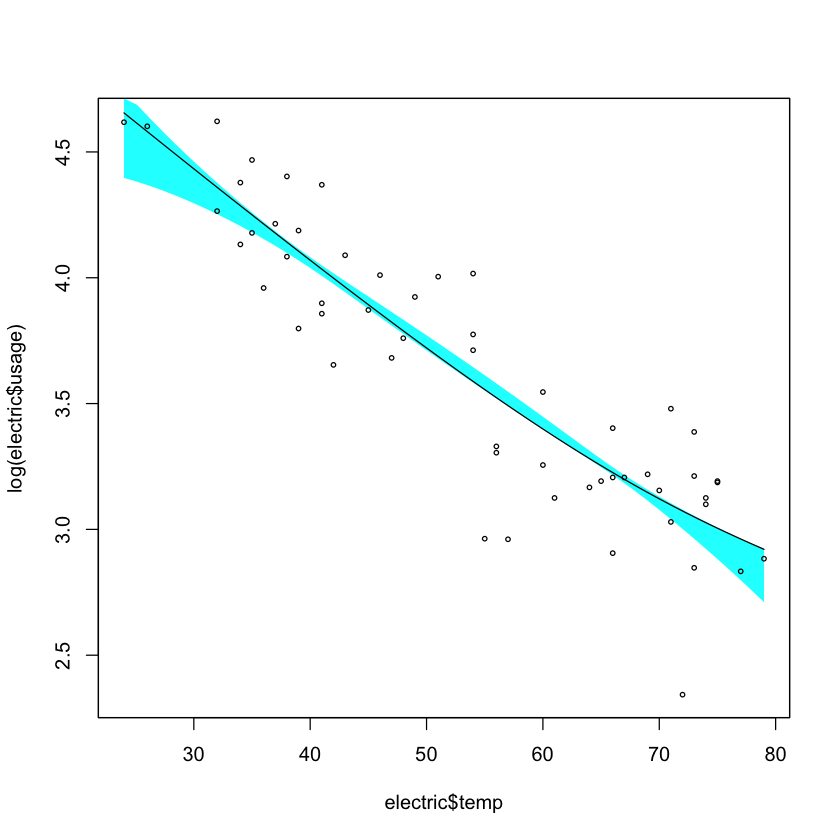

In [34]:
#part a
sm.regression(electric$temp, log(electric$usage), method='cv')
#part b
sm.regression(electric$temp, log(electric$usage), method='cv', model='linear')

**8.6 The dataset “trawl” contains data from a survery of the fauna on the sea bed in anarea lying between the coast of northern Queensland and the Great Barrier Reef.  In thisexercise, we consider the relationship between the amount of fish (expressed in terms of scorebased on log-weight), given in the variable Score1, and the location at which the fish werecaptured, described by the variables Longitude and Latitude.**

*(a) Estimate the nonparametric regression function relating Scorel to Longitude; use a local-linear kernel estimate and cross validation. Plot the data together with the function estimate. Comment on the nature of the relationship (ie linear or nonlinear)*

Based on this plot it would suggest the data is potentially linear

*(b) Repeat part (a) for the model relating Scorel to Latitude*

Based on this plot the relationship between score 1 and latitude doesn't look linear at all

*(c) Let Y denote Scorel, let X denote Latitude and let Z denote Longitude; consider a semiparametric regression model of the form*

$Y=\beta X +m (Z)+e$

*Following the approach in Example, use the function npplregbw and nnplreg in package np to estimate the parameters of the model. Plot the function estimate, using the procedure described in Example, setting ezdat to be the vector given by seq(142.8, 144, .01) and taking exdat to a vector of the same length as ezdat, with all values equal to 0.*

*(d) Find the standard error of $\hat{\beta}$ and use the standard error to construct an approximate 95% for $\beta$. Compare result to the approximate confidence intervals obtained for the slope parameter in a linear regression model relating Scorel and Latitude (ignoring longitude)*

$.54 \pm 1.96(.18)=(.1872,.8928)$

$2.01 \pm 1.96(2.92)=(-3.7131, 7.7332)$

using the semiparametric approach yielded a smaller SE and a confidence interval that does not pass through zero suggesting a significant relationship between latitude and score1 while going with the linear approach provides a larger SE and a CI that passes through zero.

In [ ]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/trawl.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/trawl.csv'
trawl<-read.csv(data_loc)

#part a
sm.regression(trawl$Longitude, trawl$Score1, method='cv')
#part b
sm.regression(trawl$Latitude, trawl$Score1, method='cv')

#part c
library('np')
trawl.bw=npplregbw(trawl$Score1~trawl$Latitude|trawl$Longitude, regtype="ll")
trawl.res=npplreg(trawl.bw)
trawl.plot=npplreg(trawl.bw, exdat=seq(142.8, 144, .01), ezdat=seq(142.8, 144, .01))$mean
plot(seq(142.8,144,.01), trawl.plot, type="l", xlab="plot", ylab="estimate of m")

In [11]:
#part d
coef(trawl.res)
coef(trawl.res, errors=T)

trawl$Latitude 
     0.5416492

trawl$Latitude 
     0.1820552

In [14]:
summary(lm(trawl$Score1~trawl$Latitude))


Call:
lm(formula = trawl$Score1 ~ trawl$Latitude)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2090 -0.7882  0.1976  0.6444  1.1911 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)     2.01897    2.92960   0.689    0.492
trawl$Latitude  0.09964    0.25440   0.392    0.696

Residual standard error: 0.7786 on 153 degrees of freedom
Multiple R-squared:  0.001002,	Adjusted R-squared:  -0.005528 
F-statistic: 0.1534 on 1 and 153 DF,  p-value: 0.6958


In [15]:
2.01+(1.96*2.92)
2.01-(1.96*2.92)

[1] 7.7332

[1] -3.7132

In [1]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/trawl.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/trawl.csv'
trawl<-read.csv(data_loc)

In [5]:
min(trawl$Longitude)

[1] 142.84